In [1]:
#!pip install watermark

# Homework
https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/cohorts/2025/01-intro/homework.md

---

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.



### Q1. Downloading the data

---

We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".

Download the data for January and February 2023.

Read the data for January. How many columns are there?

- ~~16~~
- ~~17~~
- ~~18~~
- **19**

In [2]:
ls -al ./data

total 95624
drwxrwxrwx+ 2 codespace codespace     4096 May 11 19:56 ./
drwxrwxrwx+ 6 codespace root          4096 May 11 23:47 ../
-rw-rw-rw-  1 codespace codespace  1333519 May 10 16:58 green_tripdata_2021-01.parquet
-rw-rw-rw-  1 codespace codespace  1145679 May 10 17:01 green_tripdata_2021-02.parquet
-rw-rw-rw-  1 codespace codespace 47673370 May 11 19:57 yellow_tripdata_2023-01.parquet
-rw-rw-rw-  1 codespace codespace 47748012 May 11 19:56 yellow_tripdata_2023-02.parquet


In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

In [4]:
import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [5]:
!python -V

Python 3.12.1


In [6]:
%load_ext watermark

%watermark

Last updated: 2025-05-11T23:49:26.815655+00:00

Python implementation: CPython
Python version       : 3.12.1
IPython version      : 9.0.2

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [7]:
%watermark --iversions

numpy     : 2.2.4
seaborn   : 0.13.2
pandas    : 2.2.3
matplotlib: 3.10.1
sklearn   : 1.6.1



In [8]:
df = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')

In [9]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [10]:
df.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

In [11]:
print( df.isna().any(axis=1).value_counts() )
print()
print( df.isna().any(axis=1).value_counts(normalize=True) )

False    2995023
True       71743
Name: count, dtype: int64

False    0.976606
True     0.023394
Name: proportion, dtype: float64


In [12]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [13]:
df_stats = df.drop(columns='store_and_fwd_flag') \
    .groupby(df.isna().any(axis=1)) \
    .agg(['mean','median','min','max','std']).T.dropna()

top_level_indices = df_stats.index.get_level_values(0).unique()

for feature in top_level_indices:
    display(f"=== {feature} ===")
    display(df_stats.loc[feature])

'=== VendorID ==='

,False,True
mean,1.731985,1.656315
median,2.0,2.0
min,1,1
max,2,2
std,0.442925,0.474941


'=== tpep_pickup_datetime ==='

,False,True
mean,2023-01-17 00:29:11.505633,2023-01-16 19:40:29.855344
median,2023-01-17 08:42:59,2023-01-17 08:34:32
min,2008-12-31 23:01:42,2023-01-01 00:00:00
max,2023-02-01 00:56:53,2023-01-31 23:58:58
std,9 days 15:54:49.173008,8 days 21:20:59.740107


'=== tpep_dropoff_datetime ==='

,False,True
mean,2023-01-17 00:44:50.058148,2023-01-16 19:57:16.254993
median,2023-01-17 08:58:54,2023-01-17 08:53:00
min,2009-01-01 14:29:11,2023-01-01 00:08:00
max,2023-02-02 09:28:47,2023-02-01 00:23:17
std,9 days 15:54:24.663389,8 days 21:21:12.657467


'=== trip_distance ==='

,False,True
mean,3.436199,21.011154
median,1.78,2.3
min,0.0,0.0
max,62359.52,258928.15
std,42.091351,1608.894803


'=== PULocationID ==='

,False,True
mean,166.439931,164.649499
median,162.0,161.0
min,1,1
max,265,265
std,64.067847,71.193584


'=== DOLocationID ==='

,False,True
mean,164.465083,161.368008
median,162.0,161.0
min,1,1
max,265,265
std,69.927204,70.562284


'=== payment_type ==='

,False,True
mean,1.223096,0.0
median,1.0,0.0
min,1,0
max,4,0
std,0.50206,0.0


'=== fare_amount ==='

,False,True
mean,18.308272,20.821606
median,12.8,16.97
min,-900.0,-103.61
max,1160.1,154.46
std,17.893249,13.551082


'=== extra ==='

,False,True
mean,1.56912,0.232084
median,1.0,0.0
min,-7.5,0.0
max,12.5,8.75
std,1.795131,0.792409


'=== mta_tax ==='

,False,True
mean,0.488026,0.499296
median,0.5,0.5
min,-0.5,-0.5
max,53.16,0.5
std,0.104639,0.019297


'=== tip_amount ==='

,False,True
mean,3.359193,3.733109
median,2.72,3.33
min,-96.22,-5.78
max,380.8,40.0
std,3.840552,3.176959


'=== tolls_amount ==='

,False,True
mean,0.520226,0.446048
median,0.0,0.0
min,-65.0,0.0
max,196.99,40.75
std,2.021865,1.828275


'=== improvement_surcharge ==='

,False,True
mean,0.981724,0.997136
median,1.0,1.0
min,-1.0,0.0
max,1.0,1.0
std,0.185387,0.045613


'=== total_amount ==='

,False,True
mean,26.969763,29.13359
median,20.02,24.05
min,-751.0,-89.1
max,1169.4,209.05
std,22.269083,17.057965


###### There are many rows with empty values (None, NaN) of some columns in the dataframe.

###### Compare how the statistics for rows with empty and non-empty values in the dataframe differ.

###### Most likely the difference is due to `payment_type==0` for rows with empty values.

In [14]:
df.shape, len(df.columns)

((3066766, 19), 19)

In [15]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

##### **A1:** There are 19 columns in the file `yellow_tripdata_2023-01.parquet`

### Q2. Computing duration

---

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

- ~~32.59~~
- **42.59**
- ~~52.59~~
- ~~62.59~~

In [16]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [17]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [18]:
df.duration.describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

<Axes: xlabel='duration', ylabel='Count'>

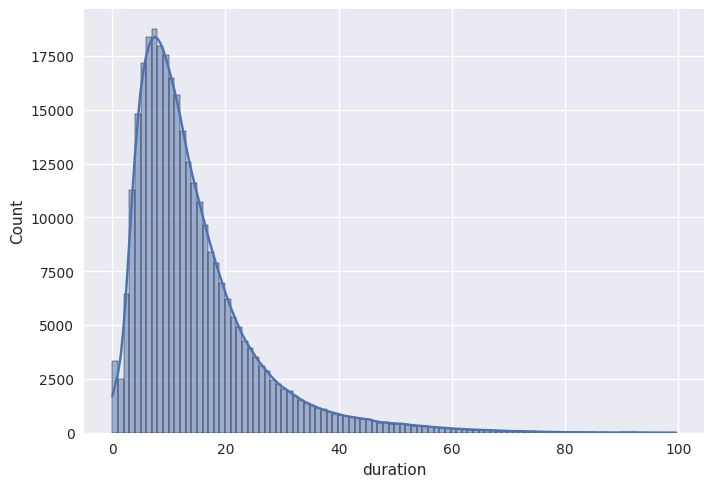

In [124]:
#df.duration.hist(bins=50)
#df.duration[df.duration<100].hist(bins=50)

sns.histplot(df.duration[df.duration<100][::10], kde=True, bins=100)

In [20]:
df.duration.std()

np.float64(42.59435124195458)

### Q3. Dropping outliers

---

Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

- ~~90%~~
- ~~92%~~
- ~~95%~~
- **98%**


In [21]:
df.duration.describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [22]:
df_ = df[(df.duration >= 1) & (df.duration <= 60)]

In [23]:
df.shape, df_.shape, len(df_)/len(df)

((3066766, 20), (3009173, 20), 0.9812202822125979)

### Q4. One-hot encoding

---

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
Fit a dictionary vectorizer
Get a feature matrix from it
What's the dimensionality of this matrix (number of columns)?

- ~~2~~
- ~~155~~
- ~~345~~
- **515**
- ~~715~~


In [24]:
df_.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration'],
      dtype='object')

In [25]:
train_dicts = df_[['PULocationID', 'DOLocationID']].astype(str).to_dict(orient='records')

dv = DictVectorizer(dtype=np.int8)
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df_[target].values

In [26]:
X_train.shape, y_train.shape

((3009173, 515), (3009173,))

In [118]:
#print(dv.vocabulary_[:10])
#print(dv.feature_names_[:10])

In [119]:
print(f"Number of features: {X_train.shape[1]}")
print("\nSample feature names:")
print(dv.get_feature_names_out()[:10])
print(dv.get_feature_names_out()[-10:])

Number of features: 515

Sample feature names:
['DOLocationID=1' 'DOLocationID=10' 'DOLocationID=100' 'DOLocationID=101'
 'DOLocationID=102' 'DOLocationID=106' 'DOLocationID=107'
 'DOLocationID=108' 'DOLocationID=109' 'DOLocationID=11']
['PULocationID=9' 'PULocationID=90' 'PULocationID=91' 'PULocationID=92'
 'PULocationID=93' 'PULocationID=94' 'PULocationID=95' 'PULocationID=96'
 'PULocationID=97' 'PULocationID=98']


### Q5. Training a model

---

Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters, where duration is the response variable
Calculate the RMSE of the model on the training data
What's the RMSE on train?

- ~~3.64~~
- **7.64**
- ~~11.64~~
- ~~16.64~~


In [29]:
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df_[target].values

In [30]:
X_train.shape, y_train.shape

((3009173, 515), (3009173,))

In [31]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6018346 stored elements and shape (3009173, 515)>

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)

7.6492624397080675

In [68]:
sklearn.metrics.r2_score(y_train, y_pred)

0.40772938425935223

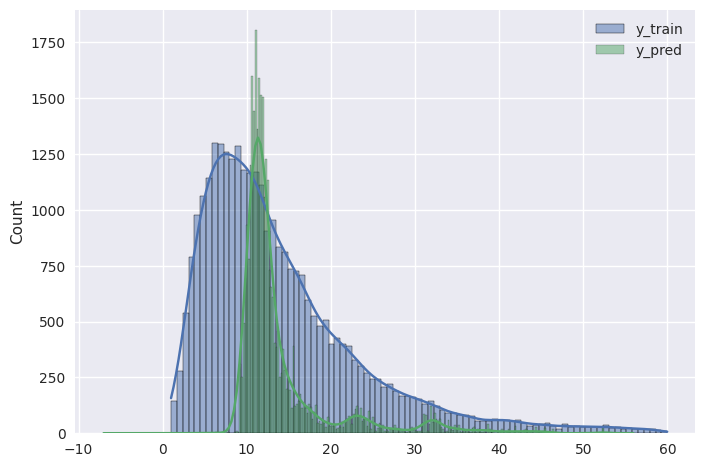

In [89]:
sns.histplot(y_train[::100], kde=True, label='y_train')
sns.histplot(y_pred[::100], kde=True, label='y_pred')
plt.legend()

Text(0, 0.5, 'y_pred')

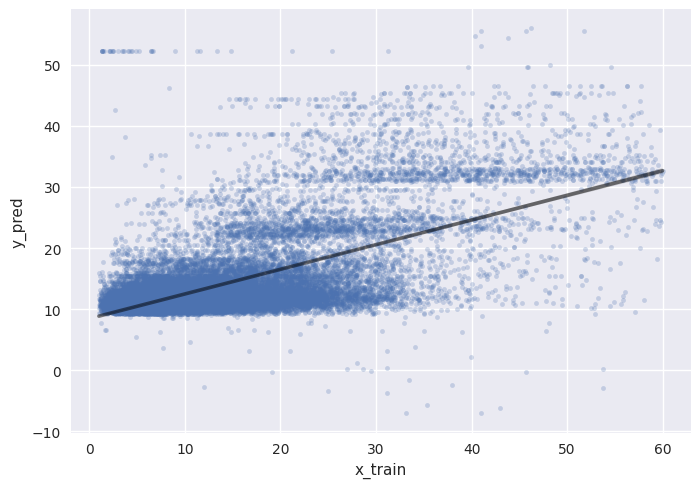

In [102]:
sns.regplot(x=y_train[::100], y=y_pred[::100], marker='.', scatter_kws=dict(alpha=0.25), line_kws=dict(color='black', alpha=0.5))
plt.xlabel('x_train')
plt.ylabel('y_pred')

### Q6. Evaluating the model

--

Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

- ~~3.81~~
- **7.81**
- ~~11.81~~
- ~~16.81~~

In [43]:
df_val = pd.read_parquet('./data/yellow_tripdata_2023-02.parquet')

In [44]:
df_val.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [45]:
df_val['duration'] = df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime
#df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)

df_val['duration'] = df_val.duration.dt.total_seconds() / 60

In [46]:
df_val = df_val[(df_val.duration >= 1) & (df_val.duration <= 60)]

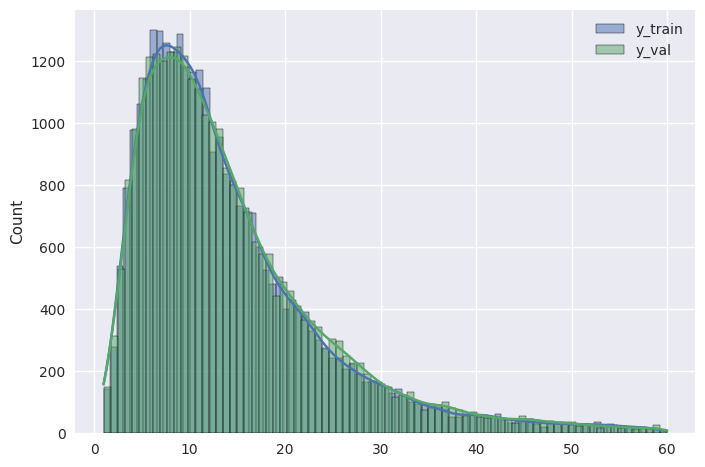

In [58]:
sns.histplot(y_train[::100], kde=True, label='y_train')
sns.histplot(y_val[::100], kde=True, label='y_val')
plt.legend()

In [47]:
val_dicts = df_val[['PULocationID', 'DOLocationID']].astype(str).to_dict(orient='records')

In [48]:
#dv = DictVectorizer()
X_val = dv.transform(val_dicts)

In [49]:
target = 'duration'
y_val = df_val[target].values

In [50]:
X_val.shape, y_val.shape

((2855951, 515), (2855951,))

In [85]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)

7.6492624397080675

In [86]:
sklearn.metrics.r2_score(y_train, y_pred)

0.40772938425935223

In [87]:
# lr = LinearRegression()
# lr.fit(X_train, y_train)

y_pred_val = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred_val)

7.81181211389241

In [88]:
sklearn.metrics.r2_score(y_val, y_pred_val)

0.39751968121762227

##### **A:** The RMSE of the model trained on the validation dataset was 7.81

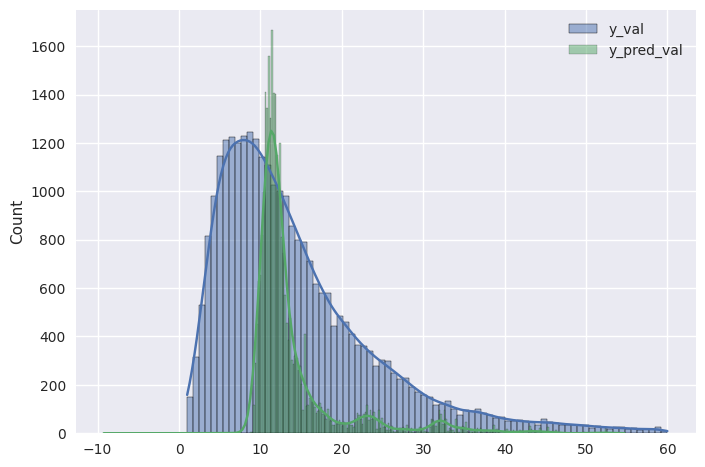

In [83]:
sns.histplot(y_val[::100], kde=True, label='y_val')
sns.histplot(y_pred_val[::100], kde=True, label='y_pred_val')
plt.legend()

Text(0, 0.5, 'y_pred_val')

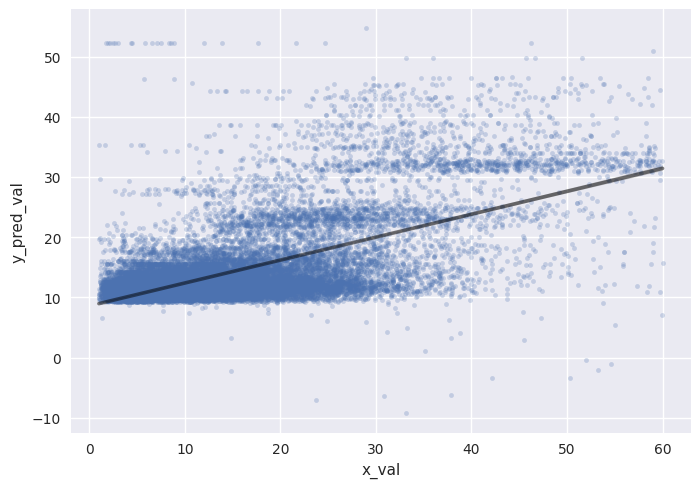

In [104]:
sns.regplot(x=y_val[::100], y=y_pred_val[::100], marker='.', scatter_kws=dict(alpha=0.25), line_kws=dict(color='black', alpha=0.5))
plt.xlabel('x_val')
plt.ylabel('y_pred_val')

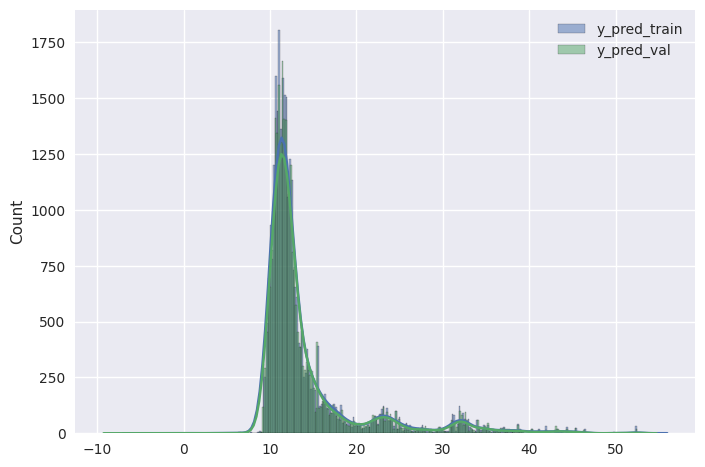

In [103]:
sns.histplot(y_pred[::100], kde=True, label='y_pred_train')
sns.histplot(y_pred_val[::100], kde=True, label='y_pred_val')
plt.legend()

##### Additionally, we check how the XGBoost regression model works on these data.
    
##### Expectedly, the model showed a significant increase in the prediction performance compared to Linear Regression both on the training and validation dataset.

In [106]:
%%time

import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    random_state=42
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_train)

print(root_mean_squared_error(y_train, y_pred))
print(sklearn.metrics.r2_score(y_train, y_pred))

6.885259832328184
0.520132064247691
CPU times: user 28.2 s, sys: 86.3 ms, total: 28.2 s
Wall time: 15.3 s


In [107]:
%%time

y_pred_val = xgb_model.predict(X_val)

print(root_mean_squared_error(y_val, y_pred_val))
print(sklearn.metrics.r2_score(y_val, y_pred_val))

7.082284031697015
0.504793922835646
CPU times: user 9.51 s, sys: 7.34 ms, total: 9.52 s
Wall time: 5.14 s


(0.0, 1400.0)

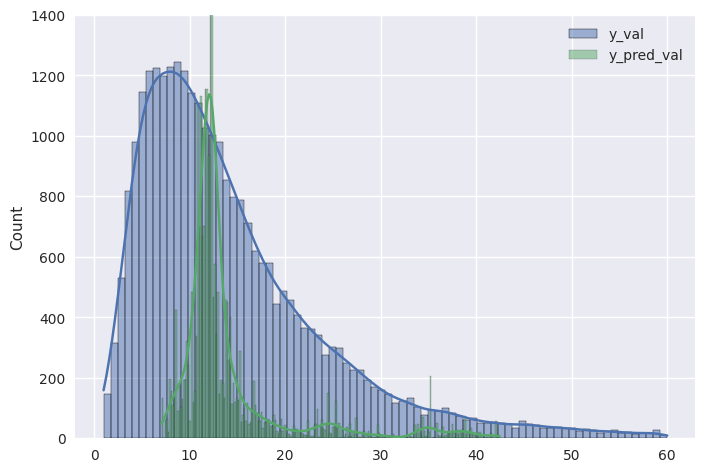

In [110]:
sns.histplot(y_val[::100], kde=True, label='y_val')
sns.histplot(y_pred_val[::100], kde=True, label='y_pred_val')
plt.legend()
plt.ylim(0, 1400)

Text(0, 0.5, 'y_pred_val')

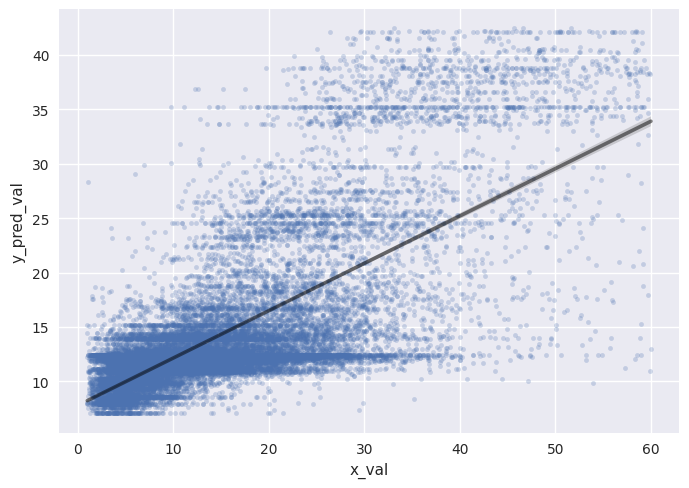

In [109]:
sns.regplot(x=y_val[::100], y=y_pred_val[::100], marker='.', 
            scatter_kws=dict(alpha=0.25), 
            line_kws=dict(color='black', alpha=0.5))
plt.xlabel('x_val')
plt.ylabel('y_pred_val')